# Mod 2 Week 2: Regression on the Boston Housing Dataset

## Introduction

In this lab, we shall apply regression analysis and diagnostics techniques covered in this section to a familiar "Boston Housing" dataset. We are going to identify the predictive ability of features found in this dataset towards identifying housing prices. 

### Objectives:
You will be able to:
* Perform statistical tests on our data
* Build linear models with boston housing data set using OLS
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

<img src="https://media.giphy.com/media/3qCAELaZ4oXLKmZlUA/giphy.gif" 
alt="IMAGE ALT TEXT HERE" border="10" />

### Import necessary libraries and load 'BostonHousing.csv' as pandas dataframe.

In [3]:
# Your code here
import numpy as np
import pandas as pd

Boston = pd.read_csv('BostonHousing.csv')

### Inspect the first few rows and all the columns of the dataset

In [4]:
# Your code here
Boston.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# Record your notes here 
#14 columns of features with very reasonable numbers
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### For this lab, we're going to narrow the data down. Create a new dataset with `['crim', 'indus', 'chas', 'rm', 'tax', 'medv']`

In [6]:
# Your code here

Boston_subset = Boston[['crim','indus','chas','rm','tax','medv']].copy()
Boston_subset.shape

(506, 6)

### Go to the dataset's documentation on [Kaggle](https://www.kaggle.com/c/boston-housing) and note what these variables mean. 

In [7]:
# crim: per capita crime
# indus: proportion of non-retail business 
# chas: near Charles River
# rm: average number of rooms
# tax: property tax
# medv: median housing price

### Optional: Plot a histogram for each variable to visualize their distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113cbaba8>,
      dtype=object)

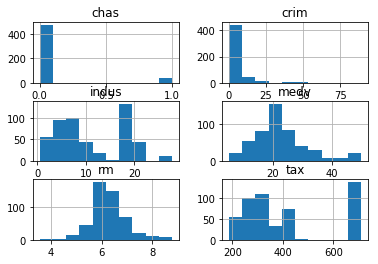

In [9]:
Boston_subset.hist()

### Answer the following questions:

1. The average effective tax rate in Massachusetts is 1.21%. Based on this dataset, is Boston's tax rate significantly more than 1.21%? (alpha = 0.05) Set up your Null and Alternative Hypotheses. In your answer, state the statistical test you're using.


In [10]:
# Null Hypothesis - Boston's tax rate is not higher than Massachusetts' tax rate
# Alternative Hypothesis - Boston's tax rate is higher than Massachusetts' tax rate

# z-test
from statsmodels.stats.weightstats import ztest

taxtest = ztest(Boston_subset['tax'], [1.21*10000], alternative ='smaller')
taxtest

# I found that Boston's tax rate is significantly higher than Massachusetts' tax rate

(-69.30358777910743, 0.0)

2. Assume that the crime rates in our dataset represent the population. What are the population's parameters (mean and standard deviation)? Is the crime rate in nearby Qunicy of **4.07 per 1000 residents** significantly different from Boston's? Again, set up your hypotheses, alpha = 0.05, and state the statistical test you're using.

In [11]:
# mean crime rate
print(Boston_subset['crim'].mean())

# standard deviation crime rate
print(Boston_subset['crim'].std())

# Null Hypothesis - Boston crime rate is not different for Qunicy's crime rate
# Alternative Hypothesis - Boston crime rate is different for Qunicy's crime rate

# z-test
crimetest = ztest(Boston_subset['crim'], [4.07], alternative ='two-sided')
print(crimetest)

# There is no difference between the crime rate of Boston and the crime rate of Quincy.

3.6135235573122535
8.601545105332487
(-0.0530167593029259, 0.9577185544997228)


3. In this lab, we are going to use **medv** as our target variable. Which of the other variables (a.k.a. *features*) (crim, rm, tax, indus) is most correlated with **medv**? 

For each feature, find the correlation coefficient with **medv** and *(bonus)* make a scatterplot. How would you interpret the correlation between our features and our target?

In [12]:
# find correlations
Boston_subset.corr()['medv']

# the average number of rooms has the highest correlation with the median housing price

crim    -0.388305
indus   -0.483725
chas     0.175260
rm       0.695360
tax     -0.468536
medv     1.000000
Name: medv, dtype: float64

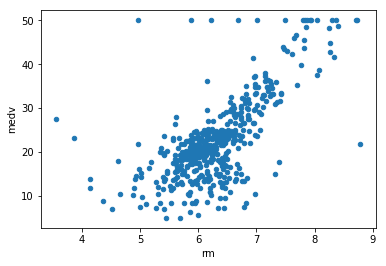

In [13]:
# plot scatterplot
Boston_subset.plot.scatter('rm','medv')

![mathdamon](https://media.giphy.com/media/9cpXRPjZuo6pq/giphy.gif "math")

## Let's do our first Regression!

Using StatsModels, run a univariate (single variable) linear regression with **medv** as the target and the most correlated column as the one feature.



In [14]:
# from your dataframe, assign y and X to your target and features respectively
# these are going to be series from your dataframe
y = Boston_subset['medv']
x = Boston_subset['rm']

In [15]:
from statsmodels.regression.linear_model import OLS

In [16]:
model = OLS(y,x)
results = model.fit()
print(results.params)
results.summary()

rm    3.65335
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Thu, 11 Apr 2019   Prob (F-statistic):          3.74e-256
Time:                        16:22:31   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What can you conclude about the relationship between **medv** and your selected feature? Put this result in context.

In [17]:
# The number of rooms variable gives predictive value to the median housing value.
# My model predicts that one additional room raises the median housing value by $3653.

## Level Up: Multiple Regression!
Now that we've done regression with one feature, let's try it out with multiple features. From our five features, take one out from your model. Justify why you chose to omit that feature.

In [18]:
# df for your four features
X = Boston_subset[['crim','indus','chas','rm','tax']]

In [19]:
model = OLS(y,X)
results = model.fit()
print(results.params)
results.summary()

crim    -0.125173
indus   -0.254768
chas     4.907563
rm       4.774454
tax     -0.010674
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1463.
Date:                Thu, 11 Apr 2019   Prob (F-statistic):          3.31e-296
Time:                        16:22:41   Log-Likelihood:                -1637.9
No. Observations:                 506   AIC:                             3286.
Df Residuals:                     501   BIC:                             3307.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.1252      0.040     -3.169      0.002      -0.203      -0.048
indus         -0.2548      0.059     -4.319      0.000      -0.371      -0.139
chas           4.9076      1.099      4.464      0.000       2.748       7.067
rm             4.7745      0.116     41.127      0.000       4.546       5.003
tax           -0.0107      0.003     -4.070      0.000      -0.016      -0.006
==============================================================================
Omnibus:                      235.204   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1360.799
Skew:                           1.981   Prob(JB):                    3.21e-296
Kurtosis:                       9.989   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Do the coefficients make sense?

In [20]:
# YES/NO/MAYBE??? 
# Yes, being close to the river and having more rooms increases the median value of housing in a neighborhood.
# Higher crime rates and more industrial areas decreases the value of houses.
# My model states that higher tax rate predicts lower value of houses, and that doesn't make sense to me.

#### Questions:
1. Between the single and multiple regression models, which did better? What metric do you use to compare?
2. Looking at the coefficients of the multiple regression model, how does **medv** change if the average number of rooms of an area goes up by 1?
3. Neighborhood A has a crime rate of 2%, has houses of 6.5 rooms on average, is subject to a property tax rate of 300 per 10,000 dollars, has an indus stat of 7, and is close to the Charles river. How much would our multiple regression model predict Neighborhood A's **medv** to be?
4. (Bonus) Without using StatsModels, write a function that takes in 4 values as parameters that outputs a prediction for **medv**.

In [21]:
# 1. The multiple regression model performs better than the single regression model 
# because the multiple model has an adjusted R^2 of .925 while the single model has an adjusted R^2 value of .901.

In [22]:
# 2. My multiple model predicts that one additional room raises the median housing value by $4774.

In [23]:
results.predict([2,7,1,6.5,300])
# 3. My model predicts that neighborhood A has a median housing value of #25,790.

array([30.70561141])

In [24]:
print(-0.1252*2 + -0.2548*7+ 4.9076*1 + 4.7745*6.5 + -0.0107*300) 

30.697850000000003


![mathdamon](https://media.giphy.com/media/7pLv68ItwBaHS/giphy.gif "goodstuff")

## Bonus:

Look up **scikit-learn** to understand the cells below. *sklearn* is the industry standard library for doing ML models. Your task is to add comments to the code to describe what's happening.

![mathdamon](https://media.giphy.com/media/iB5i8ChtOAHba/giphy.gif "goodstuff")

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [26]:
# ADD COMMENTS TO THE CODE IN THIS CELL

sklearnmodel = LinearRegression(fit_intercept=False).fit(X, y)
r_squared = sklearnmodel.score(X, y)

# you may have to change the order of this based on your X data
predict = sklearnmodel.predict(np.array([[2, 7, 1, 6.5, 300]])) 


print("Coefficients: ", sklearnmodel.coef_)
print("R2: ", r_squared)
print("Prediction: ", predict)

Coefficients:  [-0.12517343 -0.25476812  4.90756327  4.7744538  -0.01067393]
R2:  0.5505179696773875
Prediction:  [30.70561141]


![mathdamon](https://media.giphy.com/media/ESuXjz5pKQSGs/giphy.gif "goodstuff")

Are the results from your sklearn model different from your StatsModels model? Note: the R^2 values for both might be different due to the different ways sklearn and sm calculate R^2. Don't worry about it.

In [57]:
# Your observations:
# Statsmodel and sklearn give me the same results for multiple linear regression.
# The weights and the predicted values were the same.